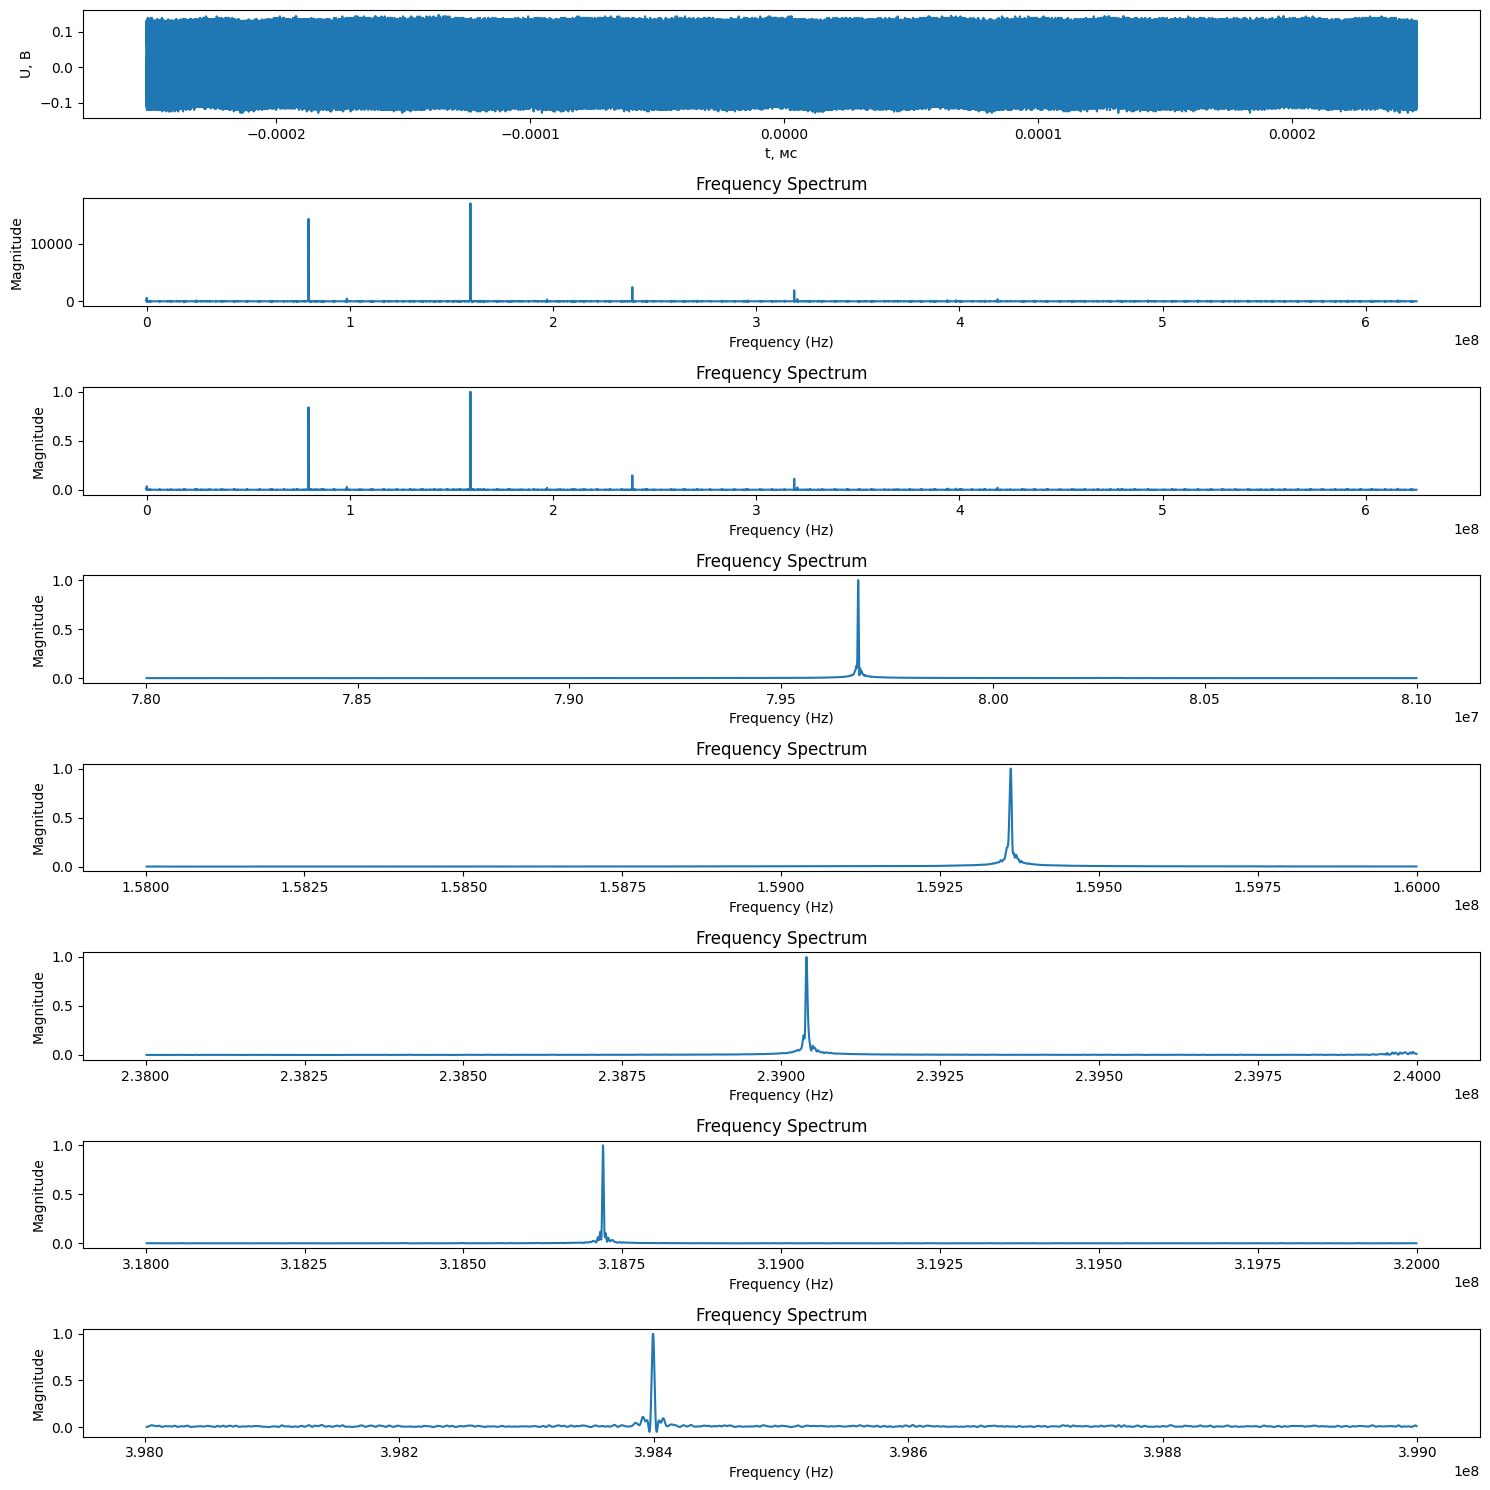

FWHM в кГц 2.3986360261291266
FWHM в кГц 3.9963932456970217
FWHM в кГц 3.3969342588186264
FWHM в кГц 2.597655609726906
FWHM в кГц 2.2956258898973463


In [19]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks

df = pd.read_csv('50mks0.csv')
#spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(-2.5100E-04, 2.4900E-04, 625000)

dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]

#sigma = 1.0
#filtered_signal = gaussian_filter1d(fft_signal, sigma)
#filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

#filtered_signal = savgol_filter(abs(fft_signal), window_length = 4, polyorder = 3)
#filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

filtered_signal = fft_signal
filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

freq_1 = []
fft_signal_1 = []
for i in range(len(freq)):
    if (freq[i]>78e6) and (freq[i]<81e6):
        freq_1.append(freq[i])
        fft_signal_1.append(abs(filtered_signal[i]))

freq_2 = []
fft_signal_2 = []
for i in range(len(freq)):
    if (freq[i]>158e6) and (freq[i]<160e6):
        freq_2.append(freq[i])
        fft_signal_2.append(abs(filtered_signal[i]))
        
freq_3 = []
fft_signal_3 = []
for i in range(len(freq)):
    if (freq[i]>238e6) and (freq[i]<240e6):
        freq_3.append(freq[i])
        fft_signal_3.append(abs(filtered_signal[i]))
        
freq_4 = []
fft_signal_4 = []
for i in range(len(freq)):
    if (freq[i]>318e6) and (freq[i]<320e6):
        freq_4.append(freq[i])
        fft_signal_4.append(abs(filtered_signal[i]))
        
freq_5 = []
fft_signal_5 = []
for i in range(len(freq)):
    if (freq[i]>398e6) and (freq[i]<399e6):
        freq_5.append(freq[i])
        fft_signal_5.append(abs(filtered_signal[i]))
        
spl_1 = interp1d(np.array(freq_1), np.array(fft_signal_1), kind='cubic')
spectr_new_1 = np.linspace(freq_1[0], freq_1[-1], 10000)
Spectr_spl_1 = spl_1(spectr_new_1)

spl_2 = interp1d(np.array(freq_2), np.array(fft_signal_2), kind='cubic')
spectr_new_2 = np.linspace(freq_2[0], freq_2[-1], 10000)
Spectr_spl_2 = spl_2(spectr_new_2)

spl_3 = interp1d(np.array(freq_3), np.array(fft_signal_3), kind='cubic')
spectr_new_3 = np.linspace(freq_3[0], freq_3[-1], 10000)
Spectr_spl_3 = spl_3(spectr_new_3)

spl_4 = interp1d(np.array(freq_4), np.array(fft_signal_4), kind='cubic')
spectr_new_4 = np.linspace(freq_4[0], freq_4[-1], 10000)
Spectr_spl_4 = spl_4(spectr_new_4)

spl_5 = interp1d(np.array(freq_5), np.array(fft_signal_5), kind='cubic')
spectr_new_5 = np.linspace(freq_5[0], freq_5[-1], 10000)
Spectr_spl_5 = spl_5(spectr_new_5)

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(15, 15))
ax[0].plot(spectr1, Spectr1)
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(filtered_signal))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

ax[2].plot(freq, filtered_signal_norm)
#ax[2].set_xlim(155e6, 165e6)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

ax[3].plot(spectr_new_1, Spectr_spl_1/max(Spectr_spl_1))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(155e6, 165e6)  
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Magnitude')
ax[3].set_title('Frequency Spectrum')

ax[4].plot(spectr_new_2, Spectr_spl_2/max(Spectr_spl_2))
#ax[4].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[4].set_xlim(155e6, 165e6) 
ax[4].set_xlabel('Frequency (Hz)')
ax[4].set_ylabel('Magnitude')
ax[4].set_title('Frequency Spectrum')

ax[5].plot(spectr_new_3, Spectr_spl_3/max(Spectr_spl_3))
#ax[5].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[5].set_xlim(155e6, 165e6) 
ax[5].set_xlabel('Frequency (Hz)')
ax[5].set_ylabel('Magnitude')
ax[5].set_title('Frequency Spectrum')

ax[6].plot(spectr_new_4, Spectr_spl_4/max(Spectr_spl_4))
#ax[6].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[6].set_xlim(155e6, 165e6) 
ax[6].set_xlabel('Frequency (Hz)')
ax[6].set_ylabel('Magnitude')
ax[6].set_title('Frequency Spectrum')

ax[7].plot(spectr_new_5, Spectr_spl_5/max(Spectr_spl_5))
#ax[7].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[7].set_xlim(155e6, 165e6) 
ax[7].set_xlabel('Frequency (Hz)')
ax[7].set_ylabel('Magnitude')
ax[7].set_title('Frequency Spectrum')

plt.tight_layout()
plt.show()

fwhm_1 = []
for i in range(len(spectr_new_1)):
    if (Spectr_spl_1[i] / max(Spectr_spl_1) - 0.5) >= 0:
        fwhm_1.append(spectr_new_1[i])
        #print(Spectr_spl_1[i], spectr_new_1[i])
#print(fwhm_1)
print('FWHM в кГц' ,(np.array(fwhm_1)[-1] - np.array(fwhm_1)[0])/1e3)

fwhm_2 = []
for i in range(len(spectr_new_2)):
    if (Spectr_spl_2[i] / max(Spectr_spl_2) - 0.5) >= 0:
        fwhm_2.append(spectr_new_2[i])
        #print(Spectr_spl_2[i], spectr_new_2[i])
#print(fwhm_2)
print('FWHM в кГц' ,(np.array(fwhm_2)[-1] - np.array(fwhm_2)[0])/1e3)

fwhm_3 = []
for i in range(len(spectr_new_3)):
    if (Spectr_spl_3[i] / max(Spectr_spl_3) - 0.5) >= 0:
        fwhm_3.append(spectr_new_3[i])
        #print(Spectr_spl_3[i], spectr_new_3[i])
#print(fwhm_3)
print('FWHM в кГц' ,(np.array(fwhm_3)[-1] - np.array(fwhm_3)[0])/1e3)

fwhm_4 = []
for i in range(len(spectr_new_4)):
    if (Spectr_spl_4[i] / max(Spectr_spl_4) - 0.5) >= 0:
        fwhm_4.append(spectr_new_4[i])
        #print(Spectr_spl_4[i], spectr_new_4[i])
#print(fwhm_4)
print('FWHM в кГц' ,(np.array(fwhm_4)[-1] - np.array(fwhm_4)[0])/1e3)

fwhm_5 = []
for i in range(len(spectr_new_5)):
    if (Spectr_spl_5[i] / max(Spectr_spl_5) - 0.5) >= 0:
        fwhm_5.append(spectr_new_5[i])
        #print(Spectr_spl_5[i], spectr_new_5[i])
#print(fwhm_5)
print('FWHM в кГц' ,(np.array(fwhm_5)[-1] - np.array(fwhm_5)[0])/1e3)

# Поиск пиков
#peaks, _ = find_peaks(abs(fft_signal))
# Определение максимального пика
#max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]
# Значение по оси x для максимального пика
#max_x_value = freq[max_peak_index]
#print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')'''
